# Algorithms and Data Structures Final Persuasive Analysis
### Noah Choate and Eli Ritchie

## Introduction

Ever since the advent of the computer, schools across the United States have tried to get as many computers as possible into students hands for educational purposes. As the price tag of the personal computer dropped moving into the 21st century, more opportunities arrived for students to learn with technology by their side. With the COVID-19 pandemic in 2020, online schooling went into full effect, with classes rapidly shifting their material into online counterparts for students to learn. While computers allowed us to execute a feasible method of education during the pandemic to students across the United States, the decline in the quality of the education provided is typically never publicized or talked about. In this analysis, we aim to compare SAT and ACT standardized test scores in the state of Texas from pre-pandemic years (2018), to post-pandemic years (2022), and analyze the difference, if any, in the scores students achieved with the shift in education modes to show the decline in education quality as we put more emphasis on learning online. We will do this by utilizing the 2018 data to estimate data for 2022, then compare it to the actual 2022 data. 

## Data Information

### About the Data

For the purpose of this assignment we have gathered information regarding Texas high school students' SAT and ACT standardized test grades from the graduating classes of 2018 and 2022 from the Texas Education Agency's (TEA) government website. We selected the two different years (2018, 2022) to analyze the difference in education during the COVID-19 Pandemic. The datasets we selected are nearly identical containing 58,751 and 61,445 datapoints for the 2018 and 2022 graduating classes respectively, each with 14 columns. 

### Loading the Data / Packages

To begin our project, we started by loading in pandas in order to manipulate our dataframe to our liking for the best possible model. Regarding the model, we load in SKLearn with libraries in particular that help us split our dataset in train and testing datasets, perform our KNN analysis, and perform a mean squared error (MSE) test to verify the accuracy of our model. Next, for some necessary computations we loaded in math, as well as matplotlib and seaborn for our visuals later on in the analysis.

In [1]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataframes in
df2018 = pd.read_excel("data/districttest2018.xlsx")
df2022 = pd.read_excel("data/districttest2022.xlsx")

In [3]:
df2018.tail()

,Group,District,DistName,County,CntyName,Region,RegnName,Grads_Mskd,Exnees_Mskd,Part_Rate,Crit_Mskd,Above_Crit_Rate,TSI_Both_Mskd,Above_TSI_Both_Rate
58747,Not Foster Care,254902,La Pryor ISD,254,Zavala County,20,San Antonio,<50,<25,68.8,<25,13.6,<25,9.1
58748,Missing Foster Care,254902,La Pryor ISD,254,Zavala County,20,San Antonio,<25,<25,NaN,<25,NaN,<25,NaN
58749,Military-Connected,254902,La Pryor ISD,254,Zavala County,20,San Antonio,<25,<25,NaN,<25,NaN,<25,NaN
58750,Not Military-Connected,254902,La Pryor ISD,254,Zavala County,20,San Antonio,<50,<25,68.8,<25,13.6,<25,9.1
58751,Missing Military-Connected,254902,La Pryor ISD,254,Zavala County,20,San Antonio,<25,<25,NaN,<25,NaN,<25,NaN


### Preparing / Cleaning the Data

We begin cleaning our data by dropping all missing / NA values from each dataset. We then begin by filtering the "Group" column to contain only rows that read "All Students." We did this because each group described failed to give us a general answer of did students perform well, such as "African-American" or sometimes described oddly-specific such as 'Missing Military-Connected." For the purpose of this assignments, we want to analyze all students, not just one particular group. We finished the cleaning by dropping some leaving Region in the event we want to highlight a specific region later on. Another set of columns we dropped were ones ending in "MSKD" columns that estimated the amount of students in a very general term. Unfortunately some rows of data had "<25" and "<50" which is a hard to use in an algorithm - it could be 3 or possibly 23. We concluded the cleaning aspect of our data by confirming our datatypes were appropriate for our algorithm. 

In [4]:
# Drop missing / null values
df2018 = df2018.dropna()
df2022 = df2022.dropna()

# If row in column "Group" does not read "All Students" - drop
df2018 = df2018[df2018['Group'] == 'All Students']
df2022 = df2022[df2022['Group'] == 'All Students']

# Drop unnecessary columns
df2018.drop(columns=['Group', 'District', 'DistName', 'CntyName', 'Grads_Mskd', 'Exnees_Mskd', 'Crit_Mskd', 'TSI_Both_Mskd'], inplace=True)
df2022.drop(columns=['Group', 'District', 'DistName', 'CntyName', 'Grads_Mskd', 'Exnees_Mskd', 'Crit_Mskd', 'TSI_Both_Mskd'], inplace=True)

# Confirm appropriate datatypes 
df2022.dtypes
df2018.dtypes

In [6]:
# Split 2018 data into features and target variable
X = df2018[['County', 'Region', 'Part_Rate', 'Above_TSI_Both_Rate']]
y = df2018['Above_Crit_Rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict 2022 scores using the trained model
y_pred_2022 = knn_model.predict(df2022[['County', 'Region', 'Part_Rate', 'Above_TSI_Both_Rate']])

# Compare predictions with actual 2022 scores
mse = mean_squared_error(df2022['Above_Crit_Rate'], y_pred_2022)
print("Mean Squared Error:", mse)

Mean Squared Error: 59.86759913978496


### Visualization

In order to visualize the difference in education quality, we aimed to plot how we predicted the school districts in the class of 2022 to perform on their standardized tests based on the data from the class of 2018 and plot it with the actual data from the class of 2022. To grade each school district, we divided them into two groups, overestimates and underestimates. Overestimates were instances where we had predicted the class of 2022 to do better in a particular school district than they actually did. Underestimates were school districts where where we had predicted the class of 2022 to perform worse than they actually did. We then plotted the visual, with a legend explaining the colors and the number of Underestimates and Overestimates. Note that the different colors do not have a "good" or "bad" association with them. 

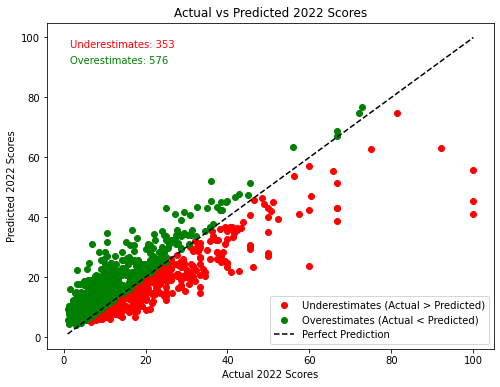

In [10]:
# Scatter plot
plt.figure(figsize=(8, 6))

# Plot underestimates (actual > predicted) as green
underestimates = df2022[df2022['Above_Crit_Rate'] > y_pred_2022]
plt.scatter(underestimates['Above_Crit_Rate'], y_pred_2022[df2022['Above_Crit_Rate'] > y_pred_2022], color='red', label='Underestimates (Actual > Predicted)')

# Plot underestimates (actual < predicted) as red
overestimates = df2022[df2022['Above_Crit_Rate'] < y_pred_2022]
plt.scatter(overestimates['Above_Crit_Rate'], y_pred_2022[df2022['Above_Crit_Rate'] < y_pred_2022], color='green', label='Overestimates (Actual < Predicted)')

# Plot Perfect Prediction line
plt.plot([df2022['Above_Crit_Rate'].min(), df2022['Above_Crit_Rate'].max()],
         [df2022['Above_Crit_Rate'].min(), df2022['Above_Crit_Rate'].max()],
         color='black', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual 2022 Scores')
plt.ylabel('Predicted 2022 Scores')
plt.title('Actual vs Predicted 2022 Scores')

# Move legend to bottom right corner
plt.legend(loc='lower right')

# Add counts of overestimates and underestimates in the top left corner
plt.text(0.05, 0.95, f'Underestimates: {len(underestimates)}', transform=plt.gca().transAxes, verticalalignment='top', color='red')
plt.text(0.05, 0.9, f'Overestimates: {len(overestimates)}', transform=plt.gca().transAxes, verticalalignment='top', color='green')

plt.show()

## Conclusion

After analyzing the data, we found that there were 353 "Underestimates" and 576 "Overestimates" per the model. The green "Overestimates" plots describes districts that performed worse than our model had predicted. The green "Underestimates," plots describes school districts where the districts performed better than than our model had predicted. In this analysis, we found 223 more instances where the school had performed worse than what we had predicted. With this information, we can tell that with data collected prior to the pandemic, we had generally expected students across Texas to perform better in the graduating class of 2022 than they actually did. This is important as it shows that maybe school districts should move away from computers when teaching the next generations of students. One important aspect to note is the reality that students and districts were impacted unfairly. Because of this, there may be situations where students performed worse not because of the implementation of technology, but the fact that there was a global pandemic, families struggled economically, psychologically etc.  